### Dataset Description
This dataset is about student achivement in secondary education of two portuguese schools. This data includes student grades,demographic, social and school related features and it was collected by using school reports and questionnaries.
- school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex: student's sex (binary: 'F' - female or 'M' - male)
- age: student's age (numeric: from 15 to 22)
- address: student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade 3-secondary education or 4-higher education)
- Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3 - secondary education or 4- higher education)
- Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian: student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures: number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup: extra educational support (binary: yes or no)
- famsup: family educational support (binary: yes or no)
- paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities: extra-curricular activities (binary: yes or no)
- nursery: attended nursery school (binary: yes or no)
- higher: wants to take higher education (binary: yes or no)
- internet: Internet access at home (binary: yes or no)
- romantic: with a romantic relationship (binary: yes or no)
- famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime: free time after school (numeric: from 1 - very low to 5 - very high)
- goout: going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health: current health status (numeric: from 1 - very bad to 5 - very good)
- absences: number of school absences (numeric: from 0 to 93)
- G1: first period grade (numeric: from 0 to 20)
- G2: second period grade (numeric: from 0 to 20)
- G3: final grade (numeric: from 0 to 20, output target)

In [78]:
#Import Necessary Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from scipy import stats
from math import sqrt
%matplotlib inline
# Ignore warnings
warnings.filterwarnings("ignore")

In [79]:
#Importing dataset
df = pd.read_csv(r"E:\ML\Datasets\student.csv")
df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


In [80]:
print("number of rows in dataset = {0} number of columns = {1}".format(df.shape[0],df.shape[1]))

number of rows in dataset = 649 number of columns = 33


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [82]:
print("Statical Description of numerical columns") 
df.describe().T

Statical Description of numerical columns


,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


Age: Mostly between 15–18 years, only few older students (outliers at 22).

Parental Education: Skewed toward 5th–9th grade (2) and higher education (4).

Study Time: Median is 2 (2–5 hrs/week) → students generally study less.

Failures: Majority students never failed, but some have up to 3 past failures.

Alcohol Use:

Workday consumption (Dalc) is low (mostly 1).

Weekend consumption (Walc) is higher, average ≈ 2.3.

Absences: Most students have low absences (0–6), but some extreme values up to 32 (possible outliers).

Grades:

Average grades ~ 11–12 (slightly above pass).

G1, G2, and G3 are highly correlated (increasing trend across terms).

## Data Cleaning

In [83]:
# checking null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [84]:
#for dublicates
df.duplicated().value_counts()

False    649
Name: count, dtype: int64

## Data Visulization

males: 266
females: 383


Text(0.5, 1.0, 'Count of Sex')

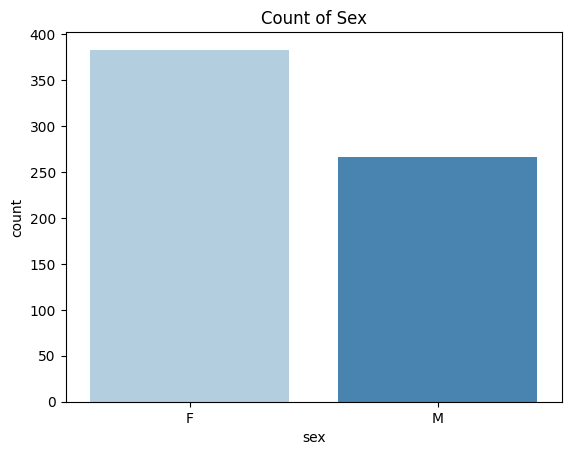

In [85]:
target_count = df.sex.value_counts()
print("males:",target_count[1])
print("females:",target_count[0])

sns.countplot(data=df,x='sex',hue="sex",palette="Blues")
plt.title("Count of Sex")

   failures sex  count
0         0   F    329
1         0   M    220
2         1   F     42
3         1   M     28
4         2   F      7
5         2   M      9
6         3   F      5
7         3   M      9


Text(0.5, 1.0, 'count of failures by sex')

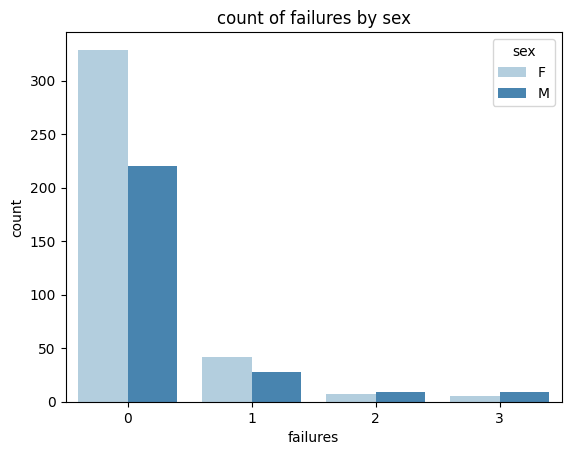

In [86]:
#groupping the dataframe by failures and sex , counting the occurnce and reseting the index.
failuer_count = df.groupby(["failures","sex"]).size().reset_index(name="count")

#printing the dataframe.
print(failuer_count)

#created count plot of failures with seaborn , differentiated by age.
sns.countplot(data=df,x='failures',hue="sex", palette="Blues")

#giving title to the plot.
plt.title("count of failures by sex")

    failures  age  count
0          0   15    108
1          0   16    161
2          0   17    153
3          0   18    112
4          0   19     13
5          0   20      2
6          1   15      4
7          1   16     12
8          1   17     19
9          1   18     19
10         1   19     13
11         1   20      3
12         2   16      3
13         2   17      1
14         2   18      6
15         2   19      3
16         2   20      1
17         2   21      2
18         3   16      1
19         3   17      6
20         3   18      3
21         3   19      3
22         3   22      1


Text(0, 0.5, 'Age')

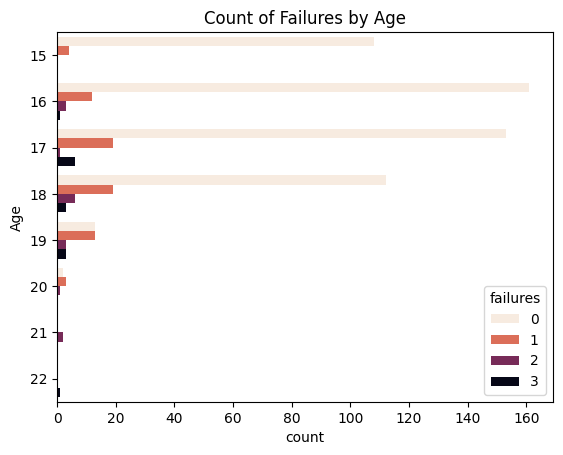

In [87]:
# Grouping the DataFrame by 'failures' and 'age', counting the occurrences, and resetting the index
failuer_count_age = df.groupby(["failures",'age']).size().reset_index(name = "count")

#showing the dataframe
print(failuer_count_age)

#plotting count the plot failuers with seaborn diffentiated by age and plotted horizontally.
sns.countplot(data=df, y = "age", hue= "failures", palette="rocket_r")

#setting the title of the plot
plt.title("Count of Failures by Age")

#stting the label for the y-axis
plt.ylabel('Age')

Text(50.722222222222214, 0.5, 'Number of Failures')

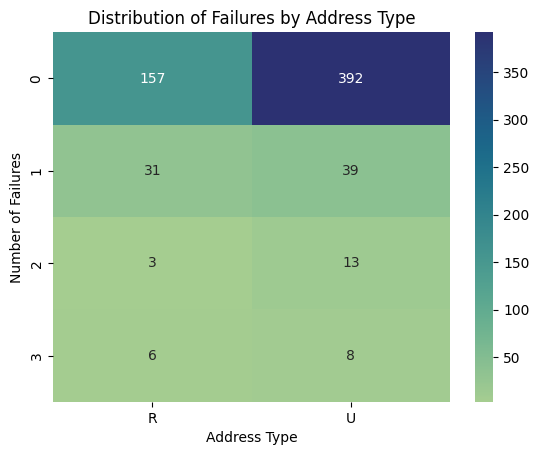

In [88]:
#create the pivot table to count the ocuuraance of failuers for each address type.
pivot_table = df.pivot_table(index="failures",columns="address",aggfunc="size")

#creatting the heatmap of the pivot_table.
sns.heatmap(data=pivot_table,annot=True,cmap='crest', fmt='g')

# Add title to the plot
plt.title('Distribution of Failures by Address Type')

# Add label for the x-axis
plt.xlabel('Address Type')

# Add label for the y-axis
plt.ylabel('Number of Failures')

Text(50.722222222222214, 0.5, 'Number of Failures')

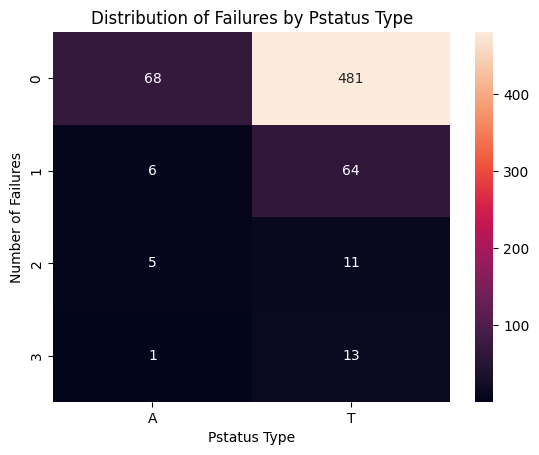

In [89]:
# Create a pivot table to count the occurrences of failures for each Pstatus type
pivot_table = df.pivot_table(index="failures",columns="Pstatus",aggfunc="size")

#creating heatmap for the pivotable
sns.heatmap(data=pivot_table,annot=True,fmt="g")

#giving title to heatmap
plt.title('Distribution of Failures by Pstatus Type')

# Add label for the x-axis
plt.xlabel('Pstatus Type')

# Add label for the y-axis
plt.ylabel('Number of Failures')

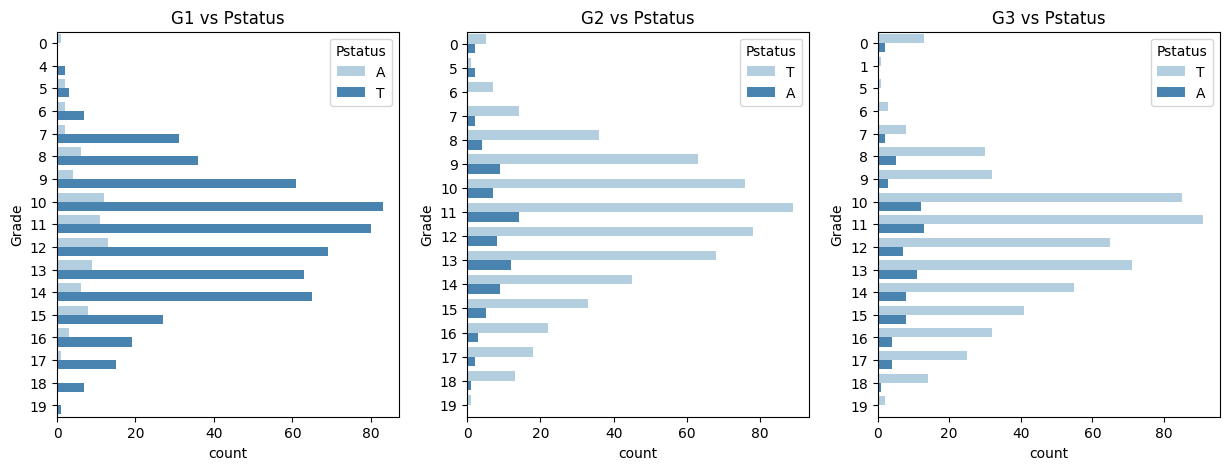

In [90]:
# Create subplots with 1 row and 3 columns, sharing y-axis
fig , axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Iterate through grade periods and plot
for i , grade_period in enumerate(["G1","G2","G3"]):
    sns.countplot(ax=axes[i],data=df,y=grade_period,hue="Pstatus",palette="Blues")
    axes[i].set_title(f'{grade_period} vs Pstatus')
    axes[i].set_ylabel("Grade")

plt.show()

## Data Preprocessing

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [92]:
#Importing necessary libs
from sklearn.preprocessing import  LabelEncoder

#creating label encoder object
label_encoder = LabelEncoder()

#List the columns to be encoded
Columns = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]

# Iterate through each column and perform label encoding.
for i in range(len(Columns)):
    #Retriving the unique value.
    Country_keys = df[Columns[i]]
    Country_keys = Country_keys.tolist()

    #label encoding
    Country_values = label_encoder.fit_transform(df[Columns[i]])
    Country_values = Country_values.tolist()

    #Update the DataFrame with the encoded values
    df[Columns[i]] = label_encoder.fit_transform(df[Columns[i]])
    
    # Create a dictionary mapping original values to encoded values
    Country_dict = dict(zip(Country_keys, Country_values))
    # Print the dictionary
    print(Country_dict)

{'GP': 0, 'MS': 1}
{'F': 0, 'M': 1}
{'U': 1, 'R': 0}
{'GT3': 0, 'LE3': 1}
{'A': 0, 'T': 1}
{'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
{'teacher': 4, 'other': 2, 'services': 3, 'health': 1, 'at_home': 0}
{'course': 0, 'other': 2, 'home': 1, 'reputation': 3}
{'mother': 1, 'father': 0, 'other': 2}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'yes': 1, 'no': 0}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}


Text(0.5, 1.0, 'Correlation Heatmap')

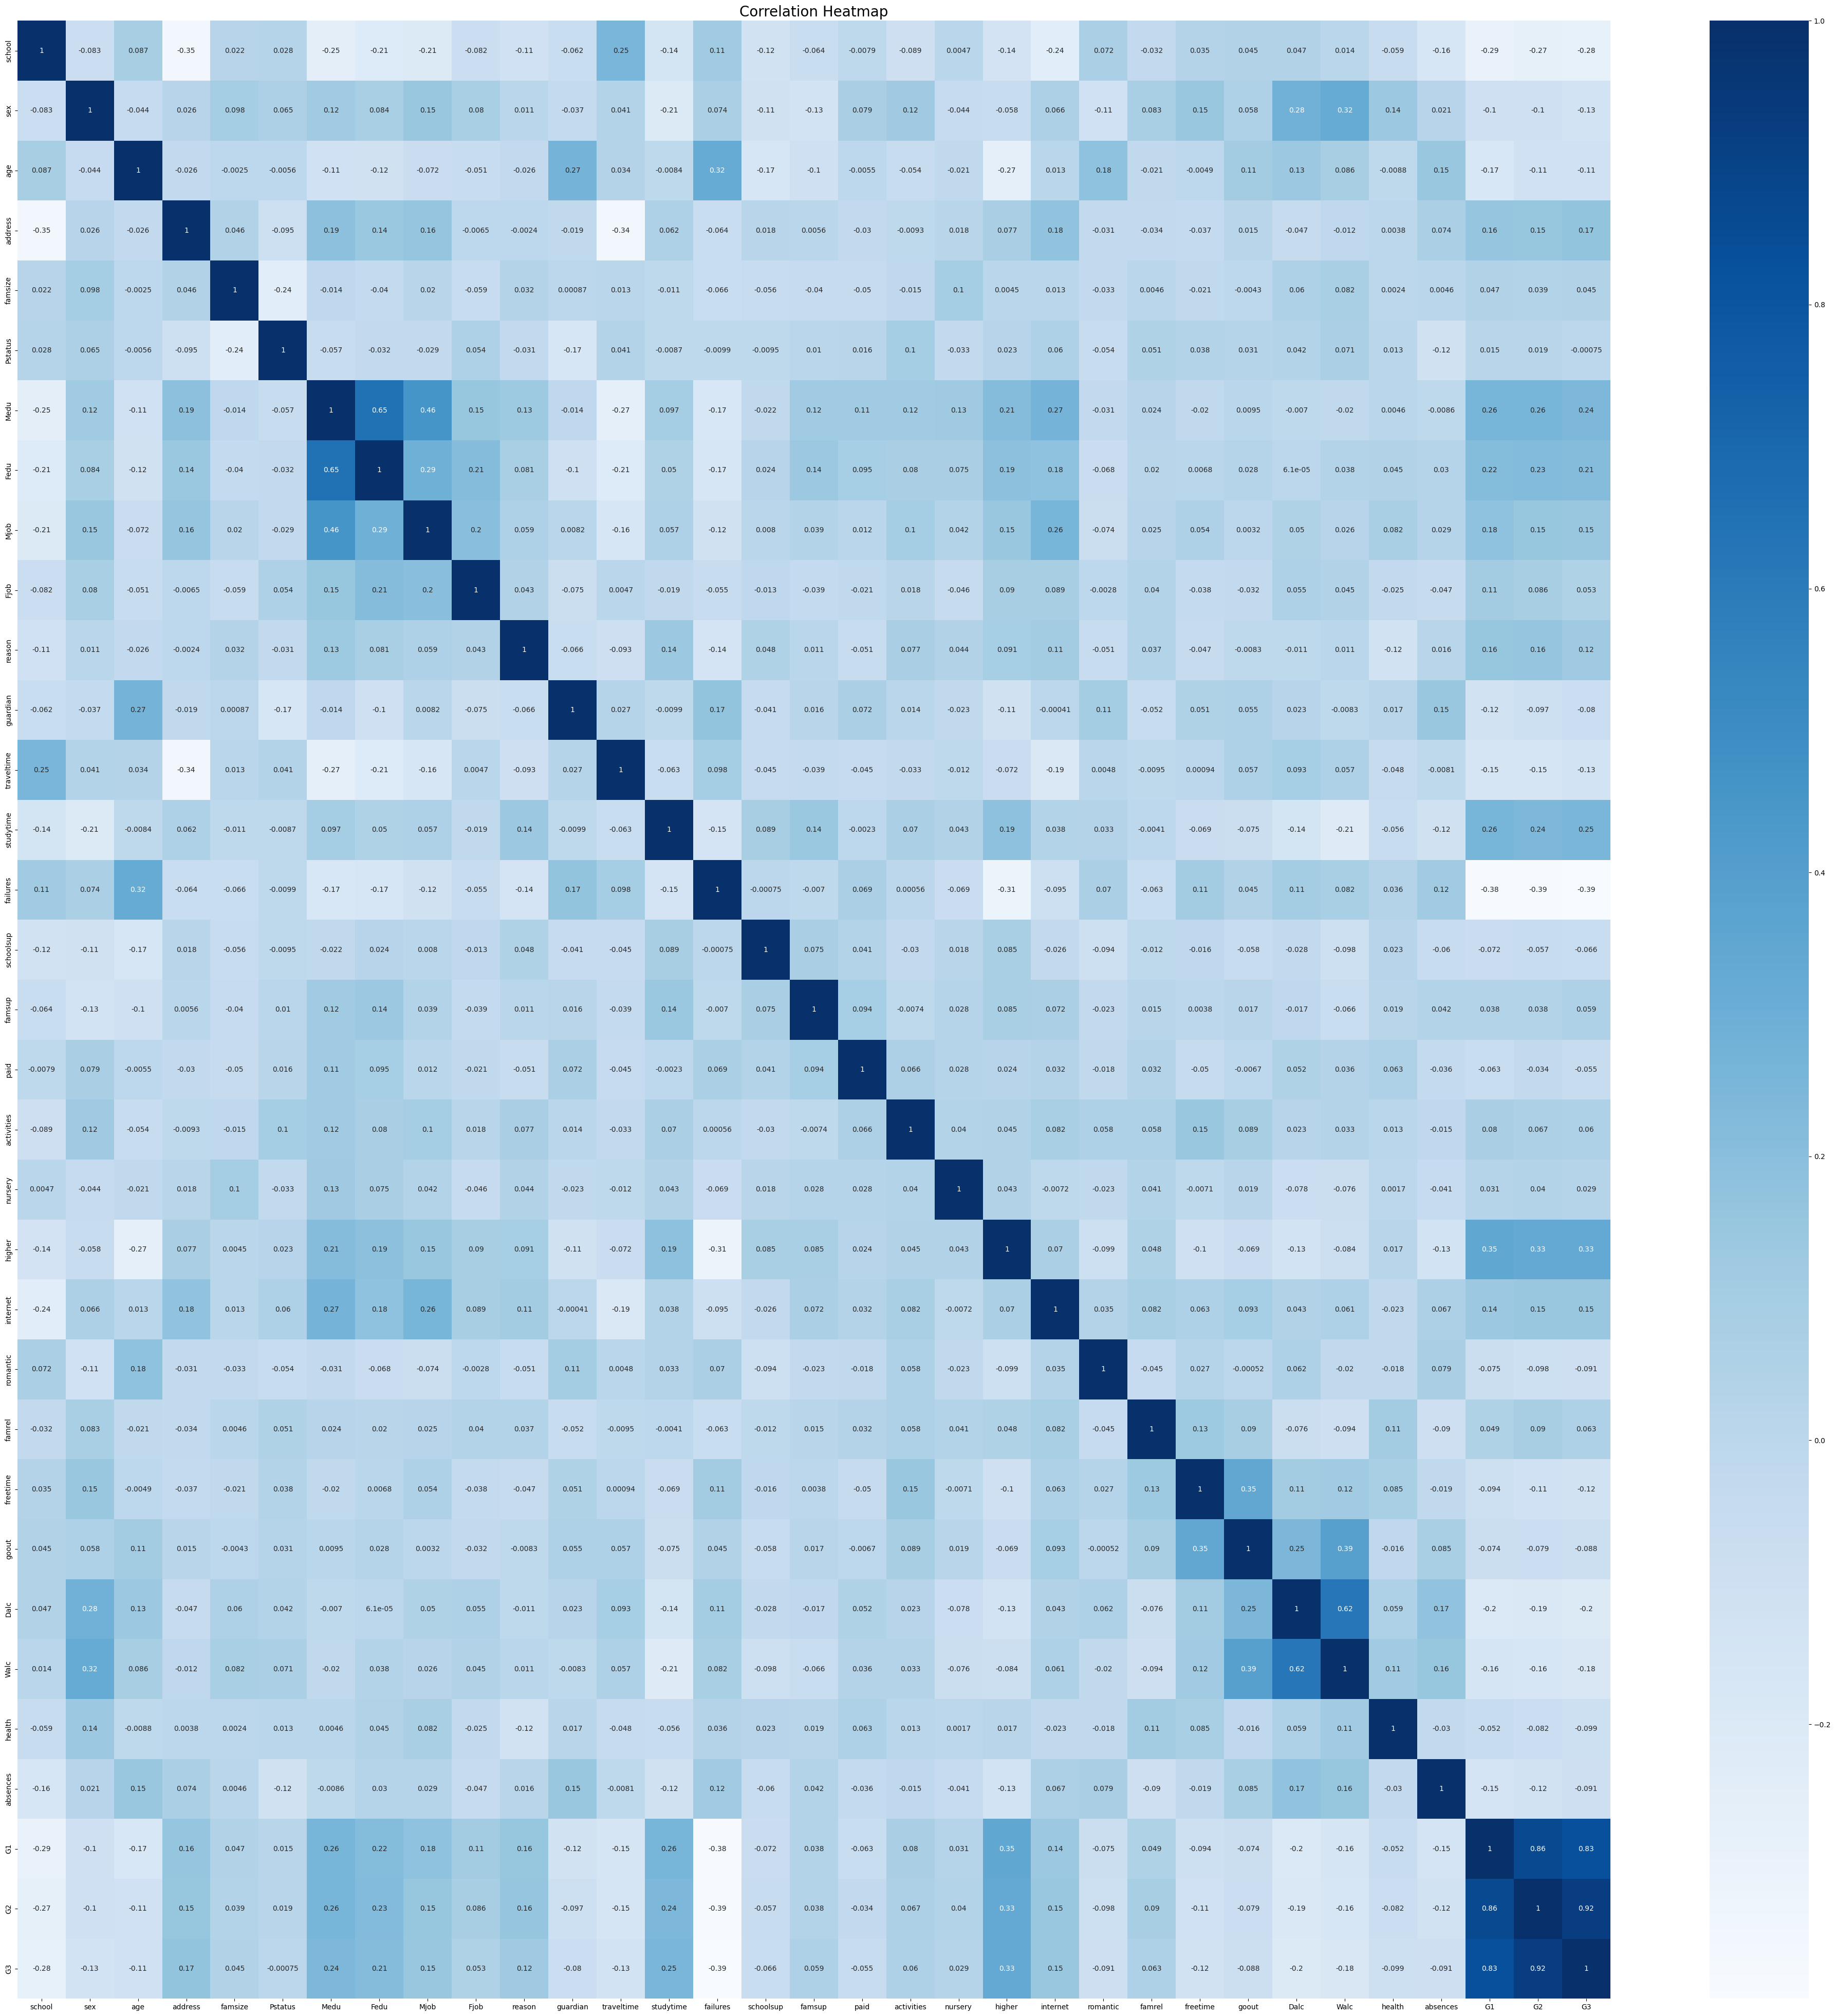

In [93]:
# Calculate the correlation matrix
corr = df.corr()

# Create a figure with a large size
plt.figure(figsize=(50,50))

# Plot the heatmap using seaborn, with annotations and a blue colormap
sns.heatmap(corr, annot=True, cmap="Blues")

# Set the title of the plot
plt.title('Correlation Heatmap', fontsize=20)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

<Axes: xlabel='G1'>

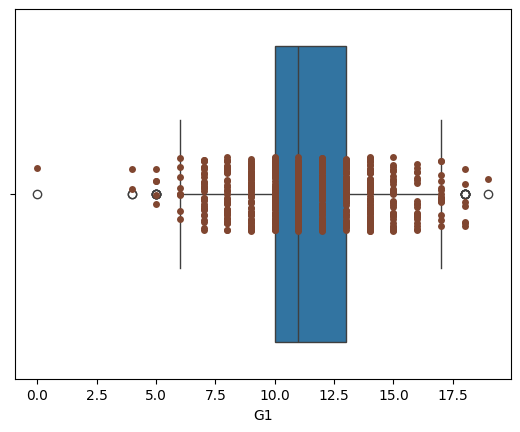

In [95]:
#checking the outliers in the feature 'G1'
sns.boxplot(data=df, x='G1')
sns.stripplot(x='G1', data=df, color="#804630") #display individual datapoints

<Axes: xlabel='G2'>

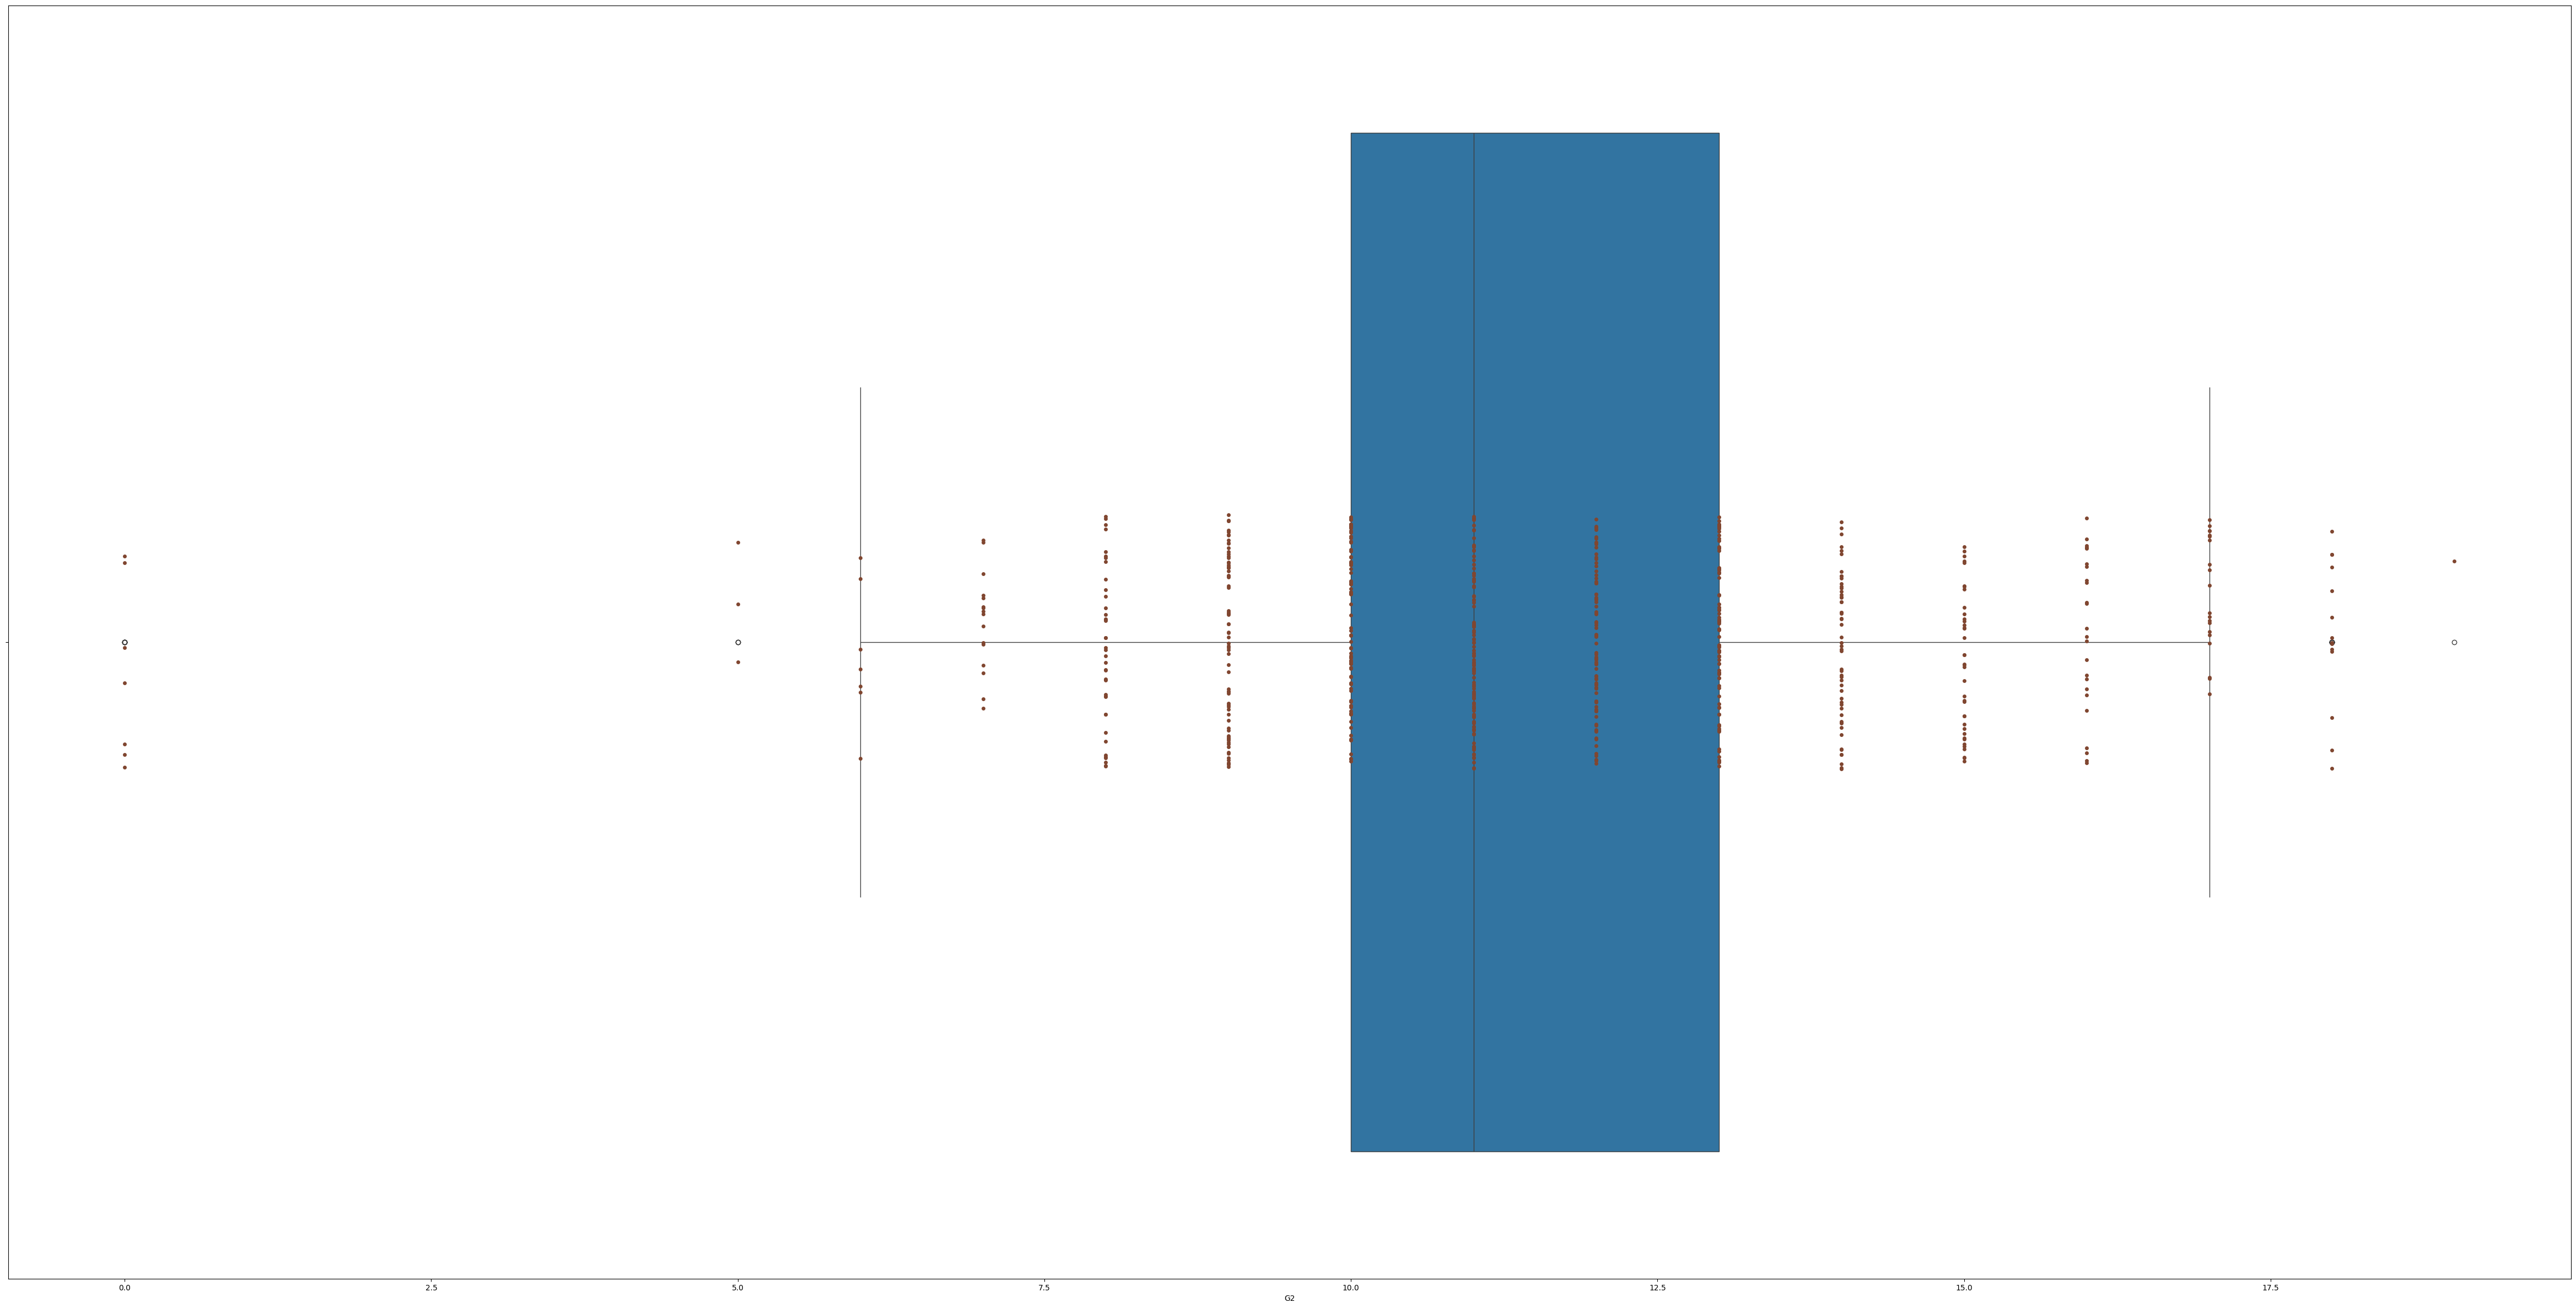

In [96]:
# cheaking the outliers in the feature 'G2'
plt.figure(figsize = (60,30))
sns.boxplot(x='G2', data=df)
sns.stripplot(x='G2', data=df, color="#804630")

In [97]:
#outlier removal using Z-score
np.abs(stats.zscore(df))
np.abs(stats.zscore(df)).shape
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #The “3” in Z-score filtering comes from statistics + the Empirical Rule (68–95–99.7 rule):
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,0,18,0,0,1,4,4,4,0,...,4,4,3,2,2,5,4,7,9,10
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


<Axes: xlabel='G1'>

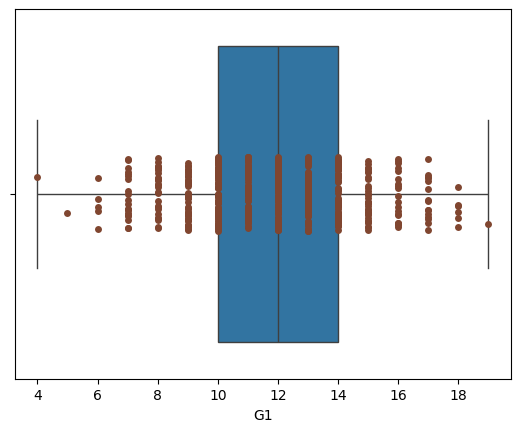

In [99]:
#checking the outliers in the feature 'G1'
sns.boxplot(data=df, x='G1')
sns.stripplot(x='G1', data=df, color="#804630") #display individual datapoints

<Axes: xlabel='G2'>

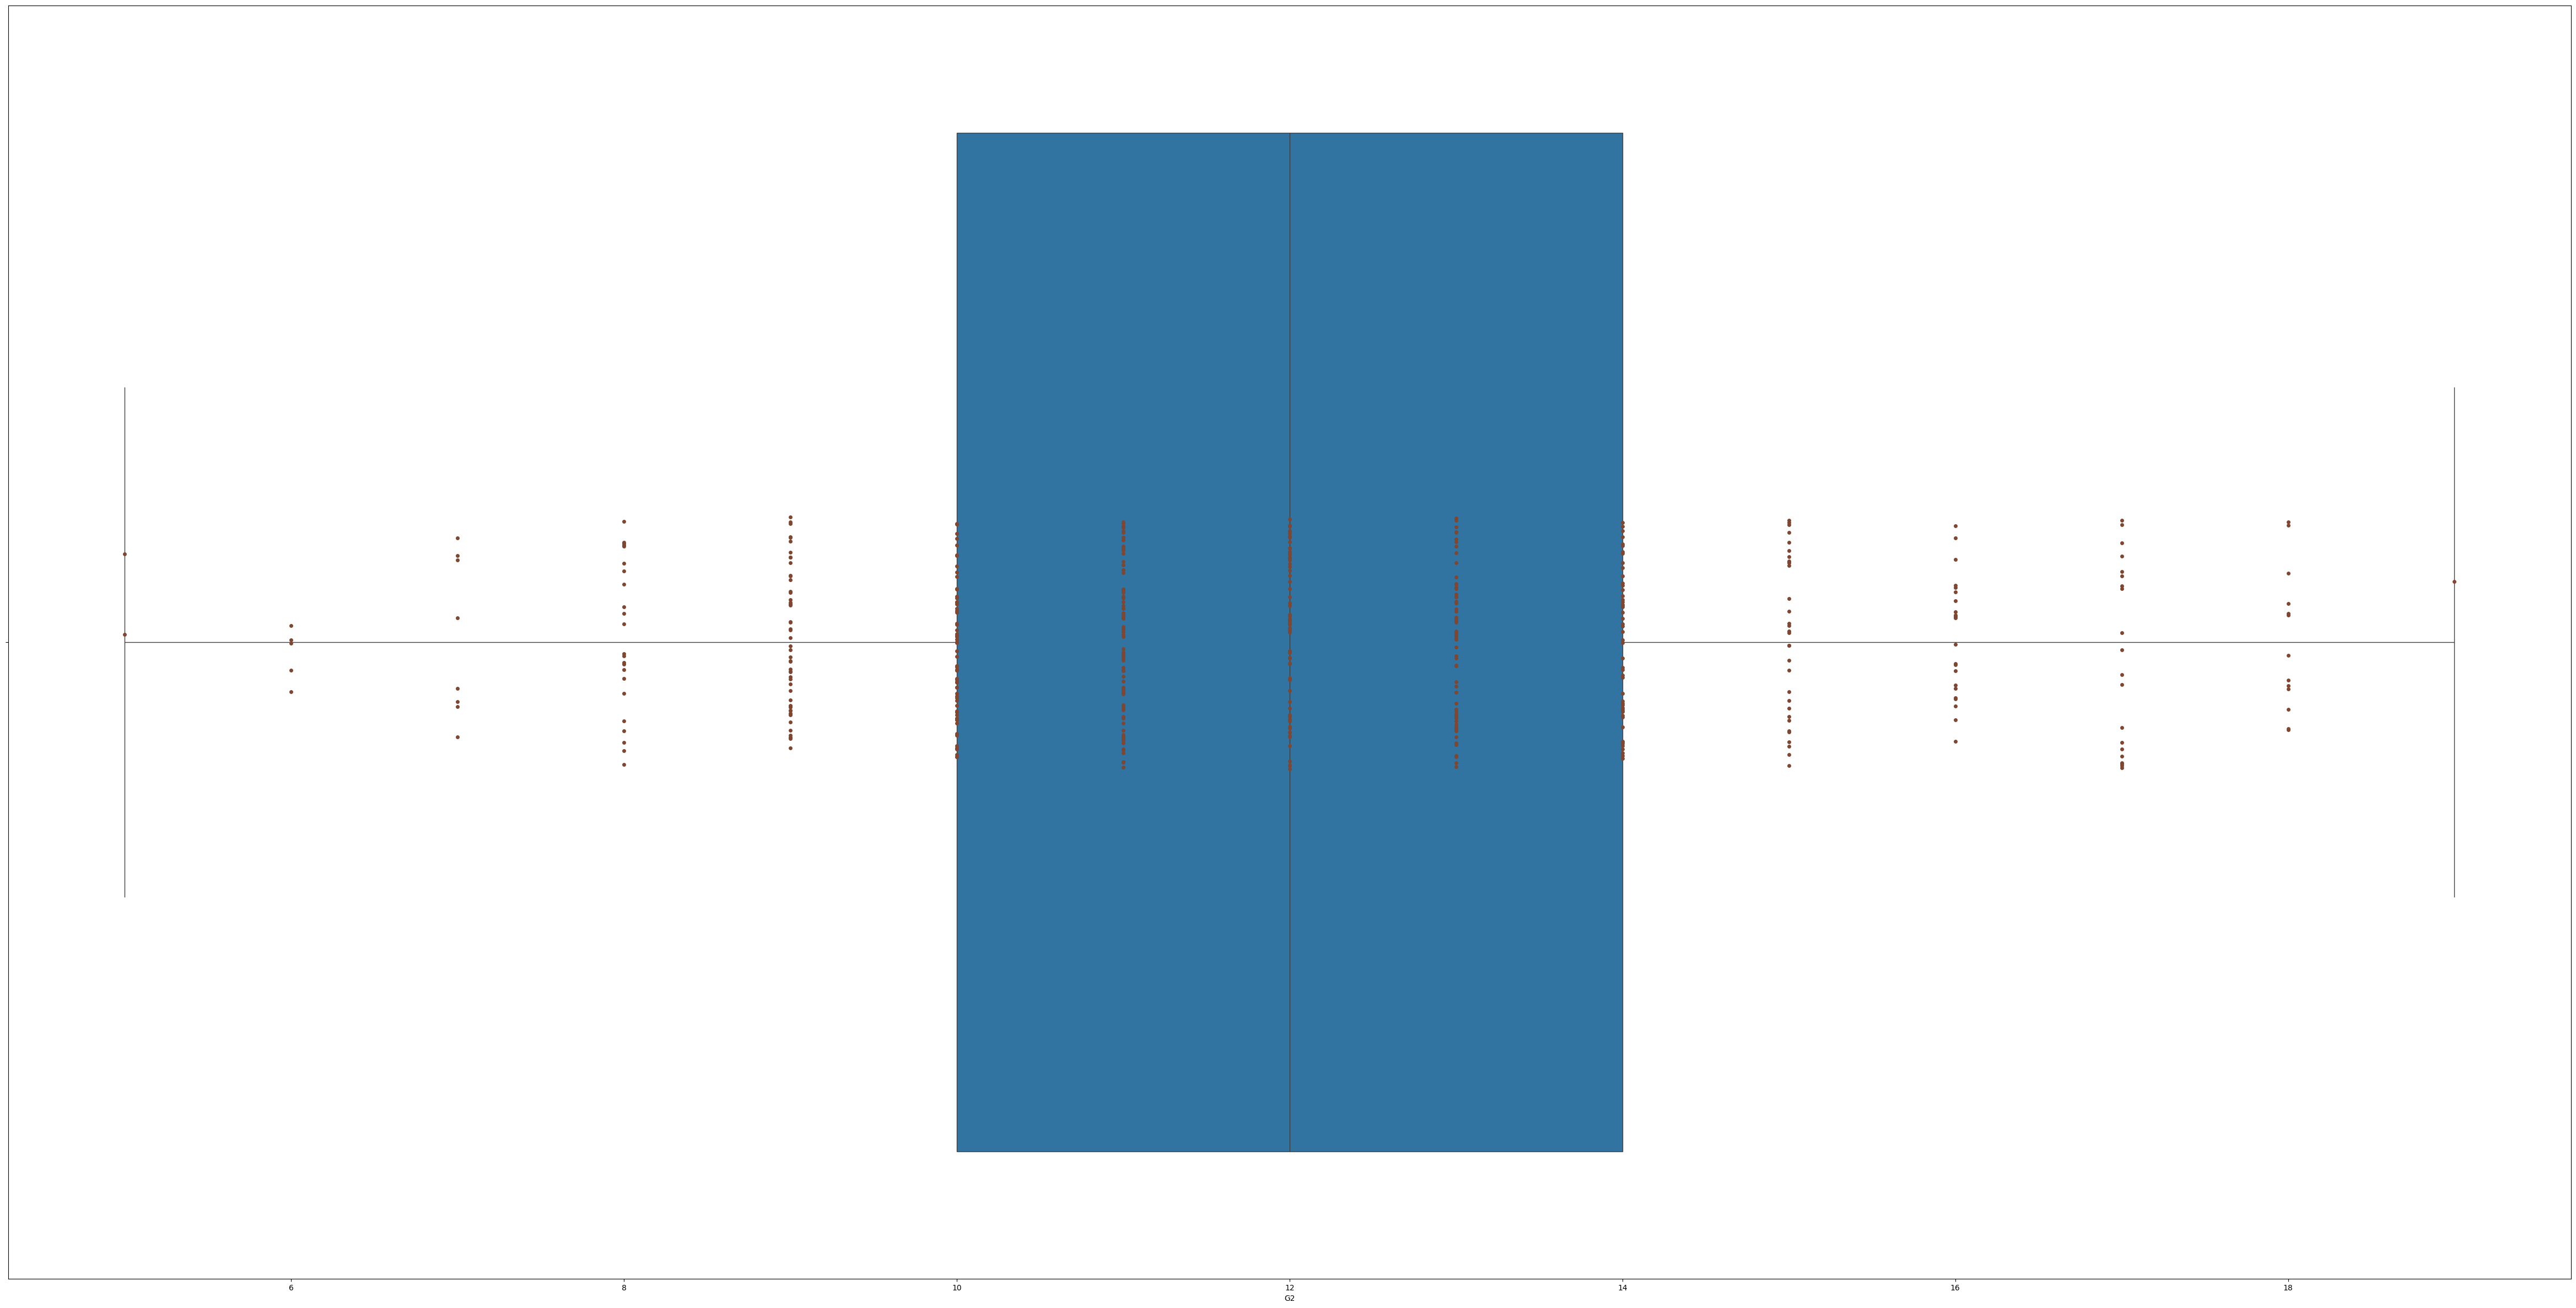

In [100]:
# cheaking the outliers in the feature 'G2'
plt.figure(figsize = (60,30))
sns.boxplot(x='G2', data=df)
sns.stripplot(x='G2', data=df, color="#804630")

## Feature Selection

In [102]:
X = df.drop('G3', axis=1)
y = df['G3']

In [104]:
all_features = X.columns
all_features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [107]:
# Taking object from the library to use the model.
# Use gini criterion to define feature importance.
dtc = DecisionTreeClassifier(random_state=0, criterion='entropy') 

In [108]:
selector = SelectFromModel(estimator=dtc)

In [111]:
selector.fit(X, y)

,estimator,DecisionTreeC...andom_state=0)
,threshold,None
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [112]:
selector.get_support(indices=True)

array([27, 29, 30, 31])

In [113]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([27, 29, 30, 31])

In [114]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Walc', 'absences', 'G1', 'G2'], dtype='object')

In [115]:
feat = ['Walc', 'absences', 'G1', 'G2']

In [ ]:
#importing Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = df[feat] #features
target = df['G3']   #target

# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

# Initialize the Linear Regression with specified parameters
LR = LinearRegression(fit_intercept= True ,n_jobs = 1)

#Train the model
LR.fit(X_train,y_train)

#Predict on the test data
y_pred = LR.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

rmse = sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("LR Mean Squared Error MSE:", mse) #model prdictis closer to actual values. 
print("LR Root Mean Squared Error RMSE:", rmse) #error in orginal units.
print("LR R^2 Score:", r2) #Variance explained

LR Mean Squared Error MSE: 0.49855812588410026
LR Root Mean Squared Error RMSE: 0.7060864861219908
LR R^2 Score: 0.9113695477749233


In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept':[True,False],
    'n_jobs':[1,-1]
}

grid = GridSearchCV(LinearRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'fit_intercept': True, 'n_jobs': 1}

In [120]:
grid.best_estimator_

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,1
,positive,False


In [122]:
grid_predictions = grid.predict(X_test)

mse = mean_squared_error(y_test, grid_predictions)

rmse = sqrt(mse)

r2 = r2_score(y_test, grid_predictions)

print("Optimaized LR Mean Squared Error MSE:", mse)
print("Optimaized LR Root Mean Squared Error RMSE:", rmse)
print("Optimaized LR R^2 Score:", r2)

Optimaized LR Mean Squared Error MSE: 0.49855812588410026
Optimaized LR Root Mean Squared Error RMSE: 0.7060864861219908
Optimaized LR R^2 Score: 0.9113695477749233


In [123]:
# Get the list of available parameters in Linear Regression model
parameters = LinearRegression().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive', 'tol'])
